In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


# Load only the first sheet "Table 01" to start the process
table_01_df = pd.read_excel('LGA Offences.xlsx', sheet_name='Table 01')
print(table_01_df)


     Year Year ending                                    Police Region  \
0    2023    December                               1 North West Metro   
1    2023    December                               1 North West Metro   
2    2023    December                               1 North West Metro   
3    2023    December                               1 North West Metro   
4    2023    December                               1 North West Metro   
..    ...         ...                                              ...   
865  2014    December                                        4 Western   
866  2014    December  Justice Institutions and Immigration Facilities   
867  2014    December  Justice Institutions and Immigration Facilities   
868  2014    December                               Unincorporated Vic   
869  2014    December                               Unincorporated Vic   

                                Local Government Area  Offence Count  \
0                                      

In [2]:
# Display the columns in communities dataset to identify relevant ones for merging
#load the dataset 
communities_df = pd.read_csv('communities.csv')

#data cleaning: remove rows with missing values and handle categorical data
communities_df_clean = communities_df.dropna()

communities_df.columns


Index(['Community Name', 'Region', 'Map reference', 'Grid reference',
       'Location', 'Population Density', 'Travel time to GPO (minutes)',
       'Distance to GPO (km)', 'LGA', 'Primary Care Partnership',
       ...
       'Time to nearest public hospital with maternity services',
       'Distance to nearest public hospital with maternity services',
       'Presentations to emergency departments, 2012-13',
       'Nearest public hospital with emergency department',
       'Travel time to nearest public hospital with emergency department',
       'Distance to nearest public hospital with emergency department',
       'Presentations to emergency departments due to injury',
       'Presentations to emergency departments due to injury, %',
       'Category 4 & 5 emergency department presentations',
       'Category 4 & 5 emergency department presentations, %'],
      dtype='object', length=226)

In [3]:
# Displaying unique values in the 'Local Government Area' and 'LGA' columns to check for discrepancies
offences_lgas = table_01_df['Local Government Area'].unique()
communities_lgas = communities_df['LGA'].unique()

offences_lgas, communities_lgas


(array([' Banyule', ' Brimbank', ' Darebin', ' Hobsons Bay', ' Hume',
        ' Maribyrnong', ' Melbourne', ' Melton', ' Merri-bek',
        ' Moonee Valley', ' Nillumbik', ' Whittlesea', ' Wyndham',
        ' Yarra', 'Total', ' Alpine', ' Bass Coast', ' Baw Baw',
        ' Benalla', ' Boroondara', ' East Gippsland',
        ' Greater Shepparton', ' Indigo', ' Knox', ' Latrobe',
        ' Manningham', ' Mansfield', ' Maroondah', ' Mitchell', ' Moira',
        ' Monash', ' Murrindindi', ' South Gippsland', ' Strathbogie',
        ' Towong', ' Wangaratta', ' Wellington', ' Whitehorse', ' Wodonga',
        ' Yarra Ranges', ' Bayside', ' Cardinia', ' Casey', ' Frankston',
        ' Glen Eira', ' Greater Dandenong', ' Kingston',
        ' Mornington Peninsula', ' Port Phillip', ' Stonnington',
        ' Ararat', ' Ballarat', ' Buloke', ' Campaspe',
        ' Central Goldfields', ' Colac-Otway', ' Corangamite',
        ' Gannawarra', ' Glenelg', ' Golden Plains', ' Greater Bendigo',
        

In [4]:
# Clean up the 'Local Government Area' column by stripping spaces and formatting
table_01_df['Local Government Area'] = table_01_df['Local Government Area'].str.strip()

# Standardizing LGA names by removing common suffixes in the communities dataset (e.g., "(C)", "(S)", "(RC)", "(B)")
communities_df['LGA_cleaned'] = communities_df['LGA'].str.replace(r'\s*\(.*\)', '', regex=True).str.strip()


# Attempt the merge again based on the cleaned columns （inner merge: ignore missing value on both sides）
merged_df_cleaned = pd.merge(table_01_df, communities_df, left_on='Local Government Area', right_on='LGA_cleaned', how='inner')

# Display the first five rows of the merged dataset
merged_df_cleaned.head()


,Year,Year ending,Police Region,Local Government Area,Offence Count,"Rate per 100,000 population",Community Name,Region,Map reference,Grid reference,...,Distance to nearest public hospital with maternity services,"Presentations to emergency departments, 2012-13",Nearest public hospital with emergency department,Travel time to nearest public hospital with emergency department,Distance to nearest public hospital with emergency department,Presentations to emergency departments due to injury,"Presentations to emergency departments due to injury, %",Category 4 & 5 emergency department presentations,"Category 4 & 5 emergency department presentations, %",LGA_cleaned
0,2023,December,1 North West Metro,Banyule,8072,6256.318199,Bellfield (Suburb),Northern and Western Metropolitan,4,D2,...,2.709002,512.853675,Austin Hospital,3.528298,2.671092,109.58941308,21.368554,266.84981687000004,52.032350,Banyule
1,2023,December,1 North West Metro,Banyule,8072,6256.318199,Briar Hill (Suburb),Northern and Western Metropolitan,2,C5,...,10.185617,649.298834,Austin Hospital,13.330700,10.147707,136.55978449999998,21.031885,306.90403882,47.266994,Banyule
2,2023,December,1 North West Metro,Banyule,8072,6256.318199,Bundoora (Suburb),Northern and Western Metropolitan,4,D1,...,8.430261,7241.403944,Austin Hospital,10.003419,8.392351,1442.553550979,19.920910,3479.246822911,48.046578,Banyule
3,2023,December,1 North West Metro,Banyule,8072,6256.318199,Eaglemont (Suburb),Northern and Western Metropolitan,4,E2,...,1.213006,1151.726057,Austin Hospital,1.920805,1.175096,246.10720129,21.368554,599.27012785,52.032350,Banyule
4,2023,December,1 North West Metro,Banyule,8072,6256.318199,Greensborough (Suburb),Northern and Western Metropolitan,2,C5,...,9.976777,4185.661882,Austin Hospital,12.480001,9.938867,925.701365896,22.116009,1989.3664530300002,47.528121,Banyule


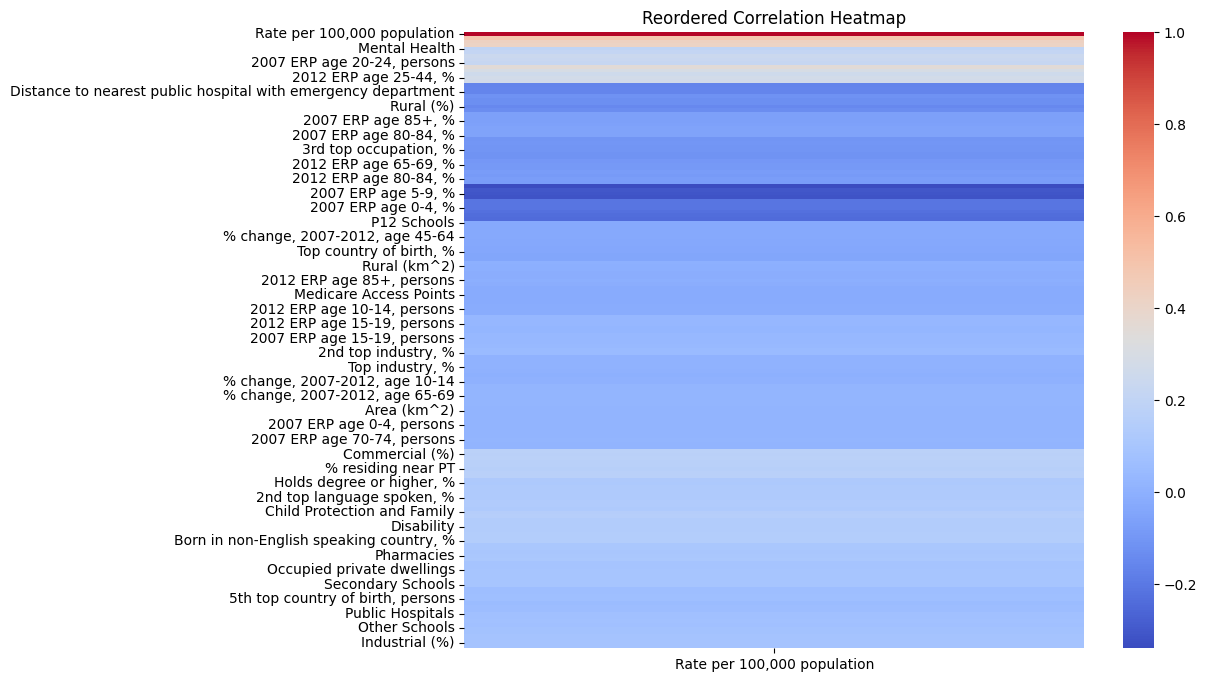

In [5]:
#Assuming merge_df_cleanded is our dataframe and we want to create a heatmap for correlation
#Compute the correlation matrix
from scipy.cluster.hierarchy import linkage, dendrogram, leaves_list
numeric_df = merged_df_cleaned.select_dtypes(include=['float64', 'int64'])

correlation_matrix =numeric_df.corr()

crime_rate_corr = correlation_matrix[['Rate per 100,000 population']].dropna()
#Perform hierarchical clustering to reorder rows and columns
linkage_matrix = linkage(crime_rate_corr, method = 'ward')

#Get the ordering of the rows and columns from the hierarchical clustering
ordered_idx = leaves_list(linkage_matrix)
#Reorder the correalation matrix
ordered_correlation_matrix = crime_rate_corr.iloc[ordered_idx, :]

#Create the heatmap
plt.figure(figsize = (10,8))
sns.heatmap(ordered_correlation_matrix, cmap='coolwarm')

#Add title
plt.title('Reordered Correlation Heatmap')

#show the heatmap
plt.show()

Correlation Matrix between Crime Rates and Proximity to Hospital:
                                                    Rate per 100,000 population  \
Rate per 100,000 population                                            1.000000   
Distance to nearest public hospital with emerge...                    -0.156347   

                                                    Distance to nearest public hospital with emergency department  
Rate per 100,000 population                                                                 -0.156347              
Distance to nearest public hospital with emerge...                                           1.000000              


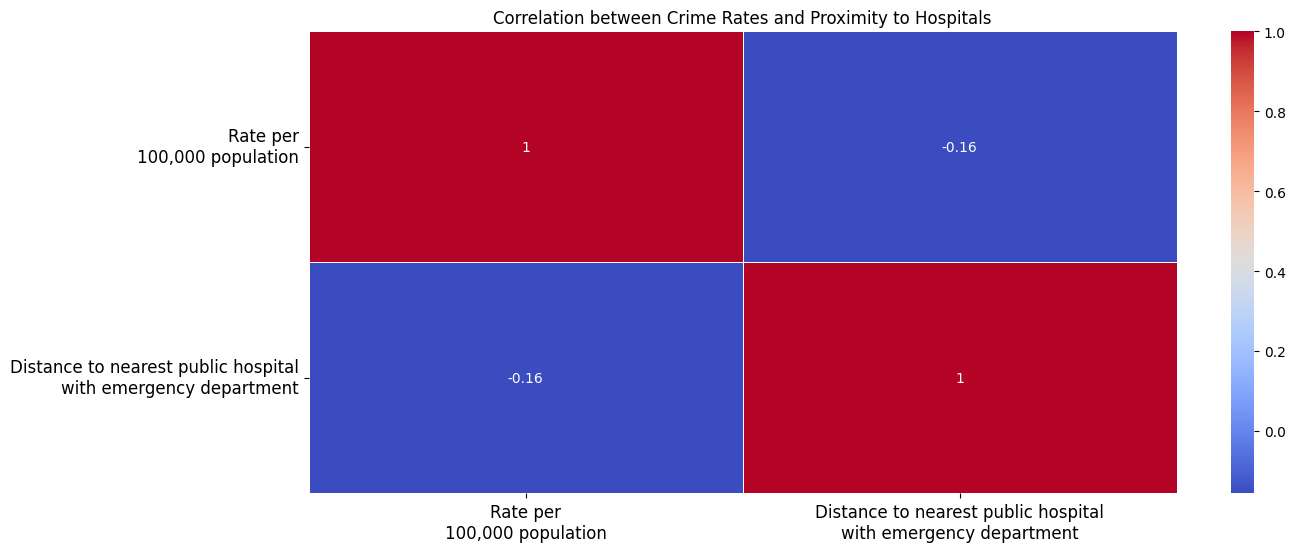

In [6]:


# Selecting relevant columns for the analysis
analysis_df = merged_df_cleaned[['Rate per 100,000 population', 
                                 'Distance to nearest public hospital with emergency department']]

# Handle non-numeric values (like '<5')
analysis_df = analysis_df.replace('<5', float('nan')).apply(pd.to_numeric, errors='coerce')

# Drop rows with missing values
analysis_df = analysis_df.dropna()

# Correlation analysis
correlation_matrix = analysis_df.corr()

# Display the correlation matrix
print("Correlation Matrix between Crime Rates and Proximity to Hospital:")
print(correlation_matrix)

# Visualizing the correlation
plt.figure(figsize=(14, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation between Crime Rates and Proximity to Hospitals")
ax = plt.gca()
ax.set_xticklabels(['Rate per\n100,000 population', 
                    'Distance to nearest public hospital\nwith emergency department'], 
                   fontsize=12) 
ax.set_yticklabels(['Rate per\n100,000 population', 
                    'Distance to nearest public hospital\nwith emergency department'], 
                   fontsize=12)
plt.show()


In [7]:

analysis_df.describe()
print(analysis_df)

       Rate per 100,000 population  \
0                      6256.318199   
1                      6256.318199   
2                      6256.318199   
3                      6256.318199   
4                      6256.318199   
...                            ...   
10673                  5127.094165   
10674                  5127.094165   
10675                  5127.094165   
10676                  5127.094165   
10677                  5127.094165   

       Distance to nearest public hospital with emergency department  
0                                               2.671092              
1                                              10.147707              
2                                               8.392351              
3                                               1.175096              
4                                               9.938867              
...                                                  ...              
10673                                         

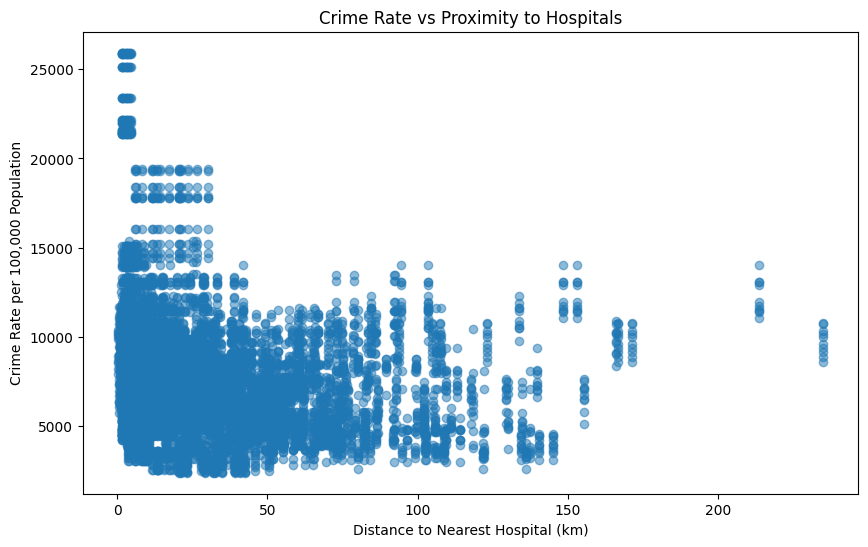

In [8]:
# Scatter plot to visualize the relationship between crime rate and proximity to the nearest hospital
plt.figure(figsize=(10, 6))
plt.scatter(analysis_df['Distance to nearest public hospital with emergency department'], 
            analysis_df['Rate per 100,000 population'], alpha=0.5)

plt.title("Crime Rate vs Proximity to Hospitals")
plt.xlabel("Distance to Nearest Hospital (km)")
plt.ylabel("Crime Rate per 100,000 Population")
plt.show()


Linear Regression Model Performance (with nomalization):  
Mean Squared Error (MSE): 10282015.98727073
R-squared (R2): 0.02790622591879599


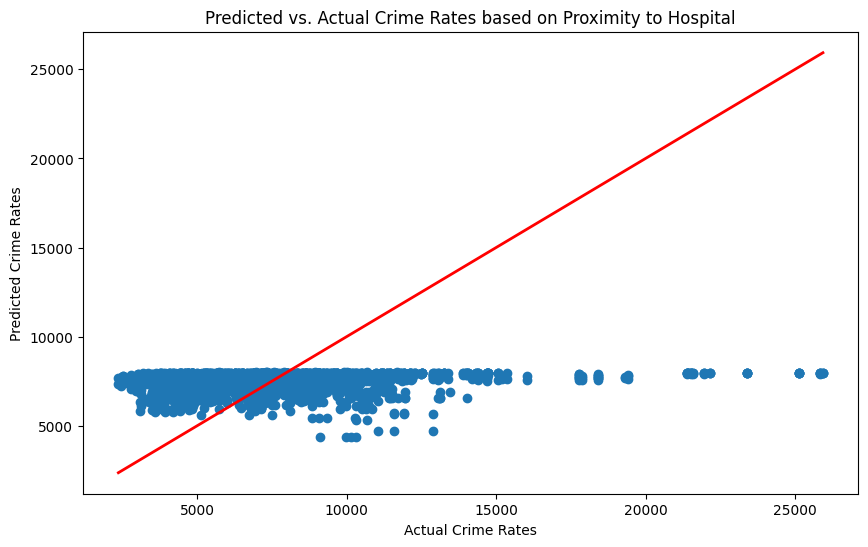

In [43]:
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report,accuracy_score,f1_score
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import LabelEncoder, StandardScaler

from sklearn.feature_selection import SelectKBest, f_regression


# Features (Distance to hospital) and target (Crime rate)
X = analysis_df[['Distance to nearest public hospital with emergency department']]
y = analysis_df['Rate per 100,000 population']

#Make a copy of X to avoid modifying the original DataFrame
X_encoded = X.copy()

#Apply LabelEncoder to all object-type columns
for col in X_encoded.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    X_encoded[col] = le.fit_transform(X_encoded[col])

#Apply StandardScalar to normalize the features
scalar = StandardScaler()
X_scaled = scalar.fit_transform(X_encoded)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# Initialize and train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Linear Regression Model Performance (with nomalization):  ")
print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R2): {r2}")

# Plot actual vs predicted crime rates
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', lw=2)
plt.xlabel('Actual Crime Rates')
plt.ylabel('Predicted Crime Rates')
plt.title('Predicted vs. Actual Crime Rates based on Proximity to Hospital')
plt.show()



In [44]:
#Train a random forest Regression Model
rf_regressor = RandomForestRegressor(n_estimators=100, random_state = 42)
rf_regressor.fit(X_train,y_train)

#predict and evaluate the Random Forest model
y_pred_rf = rf_regressor.predict(X_test)
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)
print("Random Forest Regression Model Performance (with nomalization):  ")
print(f"Mean Squared Error (MSE): {mse_rf}")
print(f"R-squared (R2): {r2_rf}")
#which indicate the linear regression is not suitable to use

Random Forest Regression Model Performance (with nomalization):  
Mean Squared Error (MSE): 827560.4213842325
R-squared (R2): 0.9217598636007209


In [36]:

import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.model_selection import train_test_split

# Features (Distance to hospital) and target (Crime rate)
X2 = merged_df_cleaned.drop(columns = ['Rate per 100,000 population'])
y2 =  merged_df_cleaned['Rate per 100,000 population']

# 将 X2 和 y2 结合，确保它们的行数一致并移除任何缺失值
data_combined = pd.concat([X2, y2], axis=1)

# 对合并后的数据进行 dropna，确保没有缺失值
data_combined_cleaned = data_combined.dropna()

# 从清理后的数据集中重新分离出 X2 和 y2
X2_cleaned = data_combined_cleaned.drop(columns=['Rate per 100,000 population'])
y2_cleaned = data_combined_cleaned['Rate per 100,000 population']

#Make a copy of X to avoid modifying the original DataFrame
X2_encoded = X2_cleaned.copy()

# Apply LabelEncoder to all object-type columns(because there is a lot of categoeical variables )
for col in X2_encoded.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    X2_encoded[col] = le.fit_transform(X2_encoded[col])

# **填充缺失值**，使用每列的均值来填充 NaN
X2_encoded.fillna(X2_encoded.mean(), inplace=True)

# Apply StandardScalar to normalize the features
scalar = StandardScaler()
X2_scaled = scalar.fit_transform(X2_encoded)

# Split the data into training and testing sets
X2_train, X2_test, y2_train, y2_test = train_test_split(X2_scaled, y2_cleaned, test_size=0.3, random_state=42)

# Feature selection
# Use SelectKBest with f_regression to select the most significant features
selector = SelectKBest(score_func=f_regression, k='all')
selector.fit(X2_train, y2_train)

# Get the p-value and scores for each feature
p_values = selector.pvalues_
scores = selector.scores_

# Create a DataFrame to view feature importance
feature_importance = pd.DataFrame({
    "Feature": X2_encoded.columns,
    'Score': scores,
    "P-Value": p_values
})

# Sort by the most significant (lowest p-value)
significant_features = feature_importance.sort_values(by='P-Value')

# Define a p-value threshold to select significant features
p_values_threshold = 0.05
selected_features = significant_features[significant_features['P-Value'] < p_values_threshold]

print("\nFeature Importance (Sorted by P-Value):")
print(significant_features)
print(f"\nSelected features (P-Value < {p_values_threshold}):")
print(selected_features)








Feature Importance (Sorted by P-Value):
                                           Feature        Score        P-Value
4                                    Offence Count  1329.244144  1.202702e-237
127             Dwellings with no motor vehicle, %  1132.952390  3.363505e-208
66                           2007 ERP age 20-24, %   805.302161  1.528848e-155
162                    Unpaid carer of children, %   608.740320  1.496194e-121
140                                     IRSD (min)   523.362163  3.716989e-106
..                                             ...          ...            ...
153                            Volunteers, persons     0.029120   8.645148e-01
179  Born in non-English speaking country, persons     0.017814   8.938325e-01
187                        Top country of birth, %     0.000373   9.845950e-01
94                      % change, 2007-2012, total     0.000109   9.916644e-01
1                                      Year ending     0.000000   1.000000e+00

[232 rows 

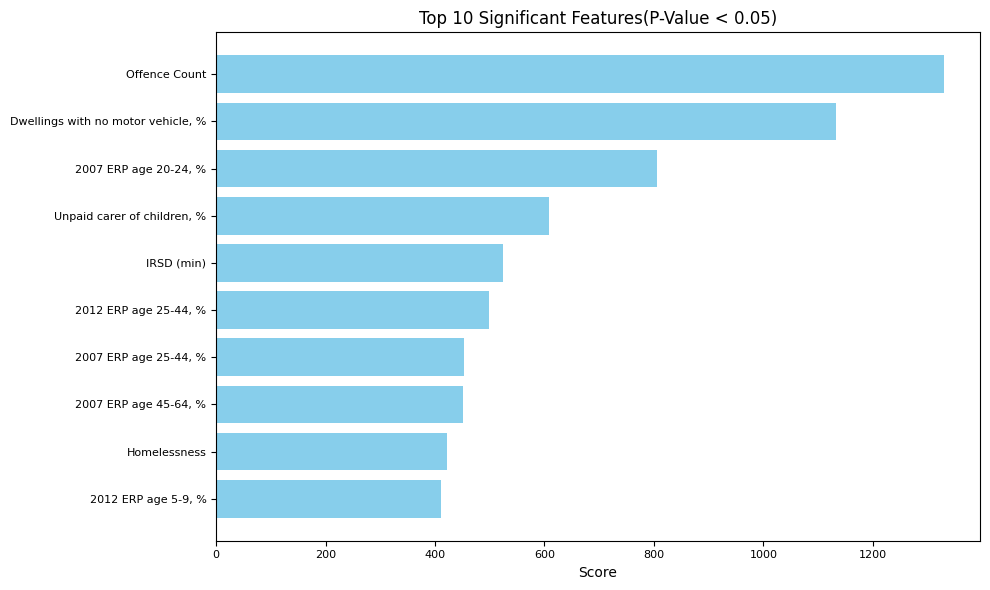

In [40]:
#Select the top features based on p-value threshold
X_train_selected = selector.transform(X2_train)
X_test_selected = selector.transform(X2_test)

#Select the top 10 significant features
top_10_features = selected_features.head(10)

#Visualize the top 10 feature importance with smaller font size
plt.figure(figsize = (10,6))
plt.barh(top_10_features['Feature'], top_10_features['Score'], color='skyblue') 
plt.xlabel('Score', fontsize = 10)
plt.title('Top 10 Significant Features(P-Value < 0.05)', fontsize = 12)
#To display the highest scores on top
plt.gca().invert_yaxis()

#Adjust tick parameers for smaller font size on both axes
plt.tick_params(axis='both', which='major', labelsize=8)


plt.tight_layout()
plt.show()

### Conclusion:
The analysis aimed to investigate whether the proximity to hospitals had any significant impact on crime rates in Victorian communities. The results reveal a **weak inverse relationship** between the two variables, with a correlation coefficient of **-0.156**, suggesting that communities closer to hospitals might have slightly higher crime rates. However, the relationship is not strong enough to draw any meaningful conclusions.

The scatterplot further visualized this weak relationship, and the linear regression model confirmed the lack of a strong predictive power. The model’s **R² value of 0.021** indicates that only **2.1%** of the variance in crime rates can be explained by proximity to hospitals, implying that this factor alone is not a major determinant of crime rates. The high **Mean Squared Error (MSE)** also indicates that the model struggled to accurately predict crime rates based on hospital proximity.

### Interpretation:
The results suggest that **proximity to hospitals is not a significant factor** in influencing crime rates in Victorian communities. While there may be a weak inverse correlation, it is not enough to suggest a strong or causal relationship. This points to the fact that **other factors**, such as socio-economic conditions, population density, or law enforcement strategies, likely play a much more prominent role in determining crime rates.

In summary, **proximity to hospitals does not appear to be a key factor** in shaping crime trends, and further research should focus on a broader range of social and economic variables to better understand the dynamics of crime in these communities.